# Lecture 2: data manipulation and visualization

We begin by loading the various libraries that we'll use, and setting the plotting parameters

In [1]:
library(tidyverse)
library(scales)
library(patchwork)
library(nycflights13)

# set a simple black & white theme for our plots
theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Part 1: Intergenerational mobility

This illustration is inspired by: https://www.youtube.com/watch?v=fSgEeI2Xpdc. Original data is from the paper Alesina, A, S Hohmann, S Michalopoulos and E Papaioannou (2019a), “Intergenerational mobility in Africa”, CEPR Discussion Paper 13497.

In [2]:
# We start by loading the data
# from https://onlinelibrary.wiley.com/doi/epdf/10.3982/ECTA17018
mobility <-
    tribble(
        ~country, ~mean, ~districts, ~median,   ~sd,  ~min,  ~max,
        "South Africa",  0.79,        216,     0.8, 0.075, 0.555, 0.896,
        "Botswana",   0.7,         23,   0.714, 0.079, 0.554, 0.909,
        "Zimbabwe",  0.63,         88,   0.726, 0.148,   0.4,     1,
        "Nigeria",  0.64,         37,   0.765, 0.201,  0.33, 0.963,
        "Egypt",  0.65,        236,   0.694, 0.105, 0.418, 0.914,
        "Tanzania",   0.6,        113,   0.611, 0.094, 0.408, 0.854,
        "Ghana",  0.58,        110,    0.65, 0.158, 0.181,  0.82,
        "Cameroon",  0.52,        230,   0.588, 0.203, 0.088, 0.896,
        "Kenya",  0.45,        173,   0.514, 0.187, 0.048, 0.873,
        "Zambia",  0.49,         72,   0.467, 0.127, 0.284, 0.785,
        "Morocco",  0.43,         59,   0.424, 0.145,  0.16, 0.723,
        "Lesotho",  0.44,         10,   0.437,  0.06, 0.317, 0.492,
        "Uganda",  0.37,        161,   0.382, 0.128, 0.015, 0.696,
        "Benin",  0.41,         77,   0.381, 0.132, 0.111, 0.649,
        "Rwanda",  0.29,         30,    0.28, 0.063,  0.22, 0.469,
        "Senegal",  0.29,         34,   0.209, 0.164, 0.078, 0.616,
        "Sierra Leone",  0.26,        107,   0.185, 0.149, 0.032, 0.694,
        "Ethiopia",  0.13,         97,   0.119, 0.235,     0, 0.865,
        "Malawi",  0.16,        227,   0.163, 0.115, 0.052, 0.643,
        "Liberia",  0.22,         47,    0.18,  0.08, 0.034, 0.345,
        "Guinea",  0.23,         34,   0.179, 0.085, 0.063, 0.491,
        "Sudan",  0.11,        129,   0.097, 0.144, 0.001, 0.551,
        "Mali",  0.21,        242,   0.128, 0.096, 0.013, 0.578,
        "Burkina Faso",  0.17,         45,   0.123,  0.08, 0.029, 0.526,
        "Mozambique",   0.1,        144,   0.064, 0.086, 0.015, 0.707,
        "South Sudan",  0.04,         72,   0.024, 0.056,     0, 0.319
    )

Saving 6.67 x 6.67 in image



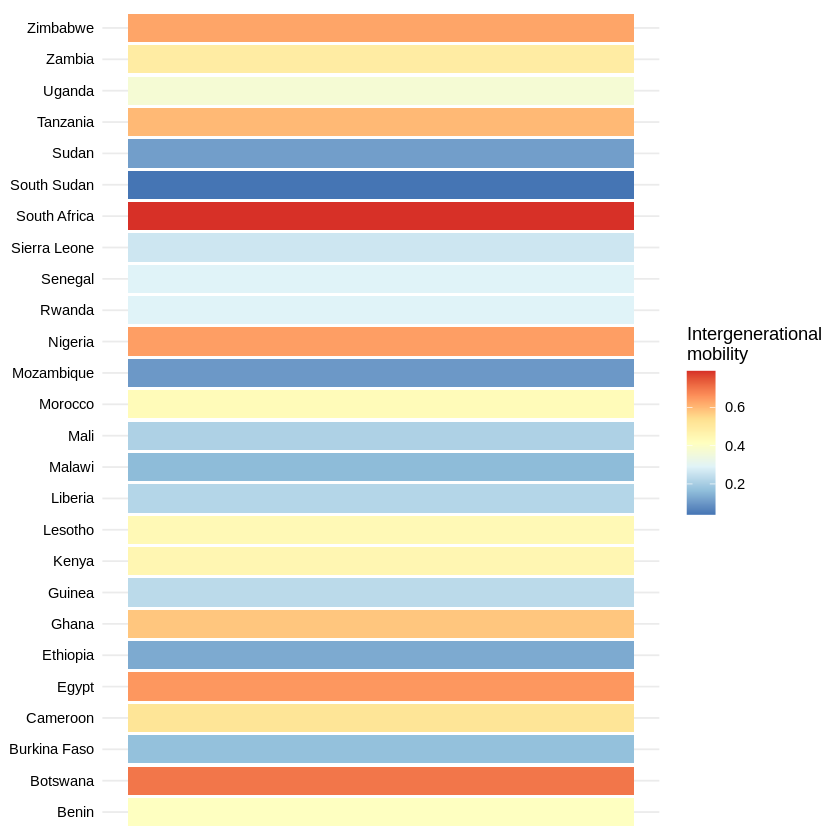

In [3]:
gg_hue1 <- ggplot(mobility, aes(x = 1, y = country)) +
    geom_col(aes(fill = mean)) +
    scale_fill_distiller(name = "Intergenerational\nmobility", palette = "RdYlBu") +
    scale_x_continuous(labels = NULL, breaks = NULL)  +
    theme_minimal()  +
    theme(axis.title.x = element_blank(), axis.title.y = element_blank(),
          axis.text.y = element_text(colour="black"))
gg_hue1
ggsave('figs/mobility_hue1.png')

Saving 6.67 x 6.67 in image



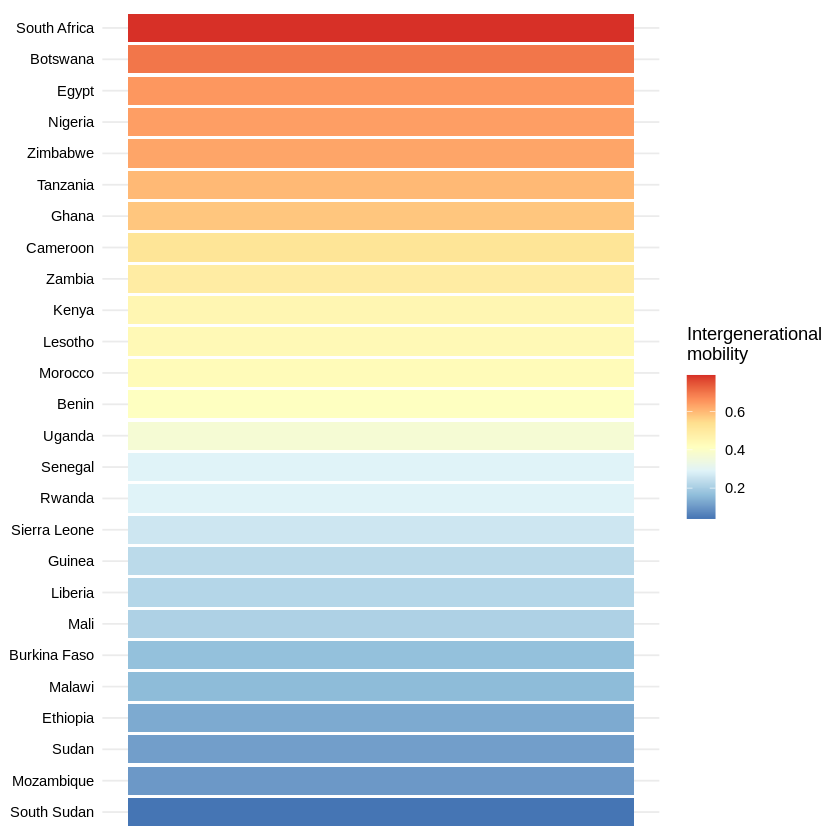

In [4]:
# hue, sorted
gg_hue2 <- gg_hue1 + aes(y = fct_reorder(country, mean))
gg_hue2
ggsave('figs/mobility_hue2.png')

Saving 6.67 x 6.67 in image



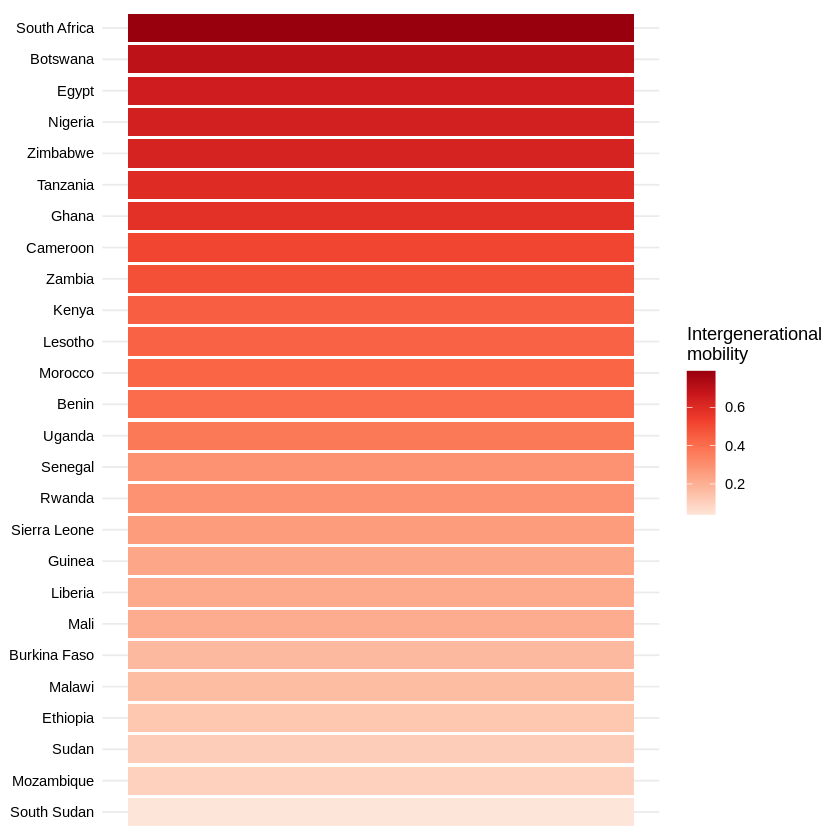

In [5]:
# shade

gg_hue3 <- ggplot(mobility, aes(x = 1, y = fct_reorder(country, mean))) +
    geom_col(aes(fill = mean)) +
    scale_fill_distiller(name = "Intergenerational\nmobility", palette = "Reds", direction = 1) +
    scale_x_continuous(labels = NULL, breaks = NULL)  +
    theme_minimal()  +
    theme(axis.title.x = element_blank(), axis.title.y = element_blank(),
          axis.text.y = element_text(colour="black"))
gg_hue3
ggsave('figs/mobility_hue3.png')

Saving 6.67 x 6.67 in image



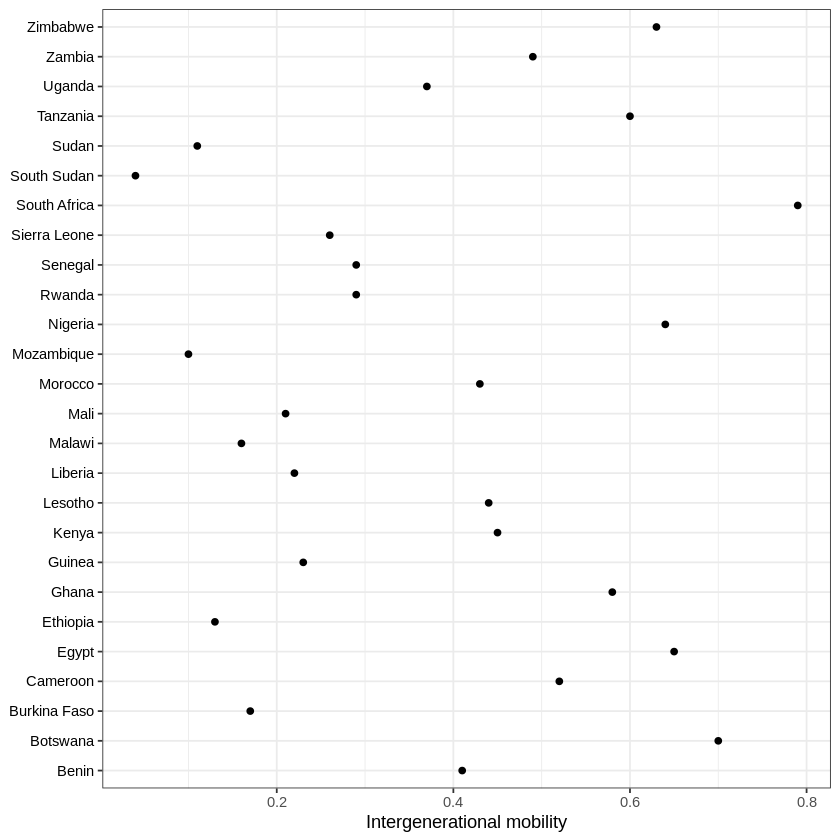

In [6]:
gg_dot1 <- ggplot(mobility, aes(x = mean, y = country)) +
    geom_point() +
    scale_x_continuous("Intergenerational mobility") +
    theme(axis.title.y = element_blank(), axis.text.y = element_text(colour="black"))
gg_dot1
ggsave('figs/mobility_dot1.png')

Saving 6.67 x 6.67 in image



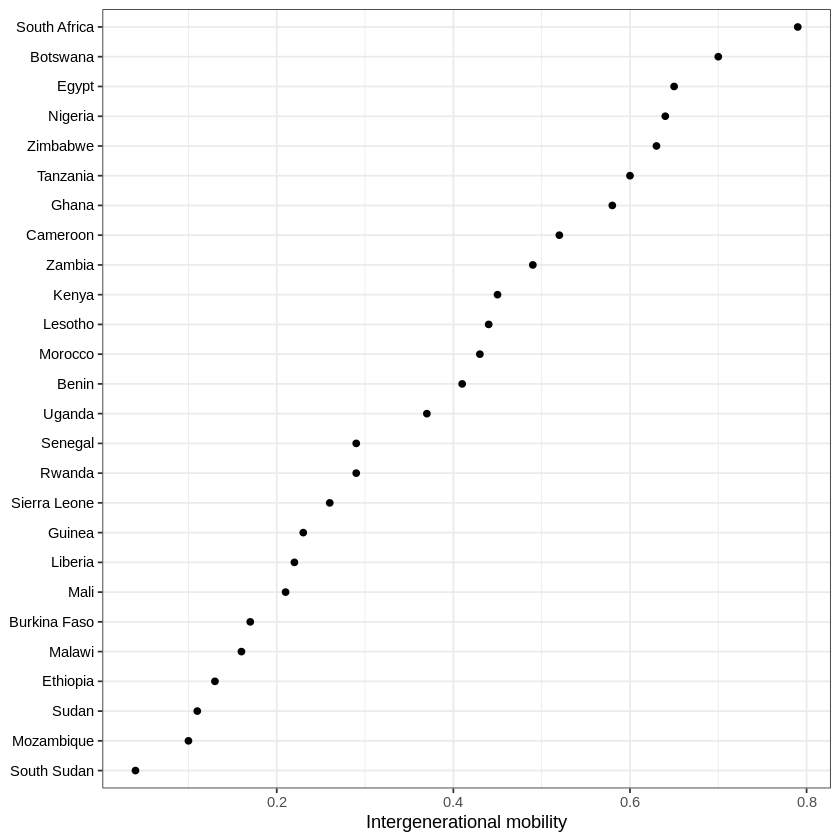

In [7]:
gg_dot2 <- gg_dot1 + aes(y = fct_reorder(country, mean))
gg_dot2
ggsave('figs/mobility_dot2.png')

Saving 6.67 x 6.67 in image



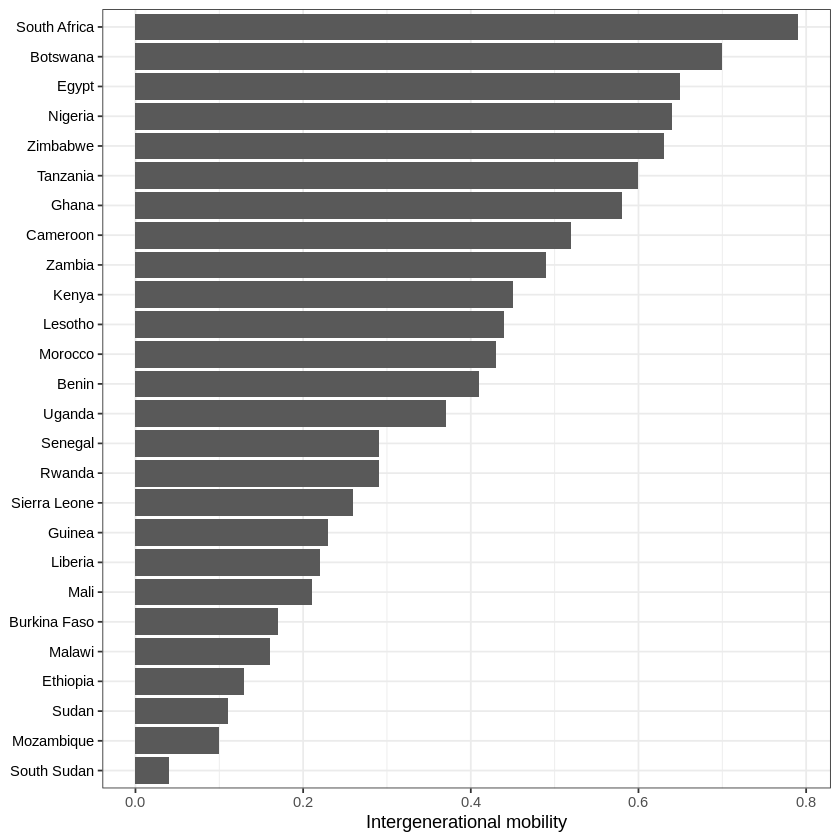

In [8]:
gg_dot3 <- ggplot(mobility, aes(x = mean, y = fct_reorder(country, mean))) +
    geom_col() +
    scale_x_continuous("Intergenerational mobility") +
    theme(axis.title.y = element_blank(), axis.text.y = element_text(colour="black"))
gg_dot3
ggsave('figs/mobility_dot3.png')

Saving 6.67 x 6.67 in image



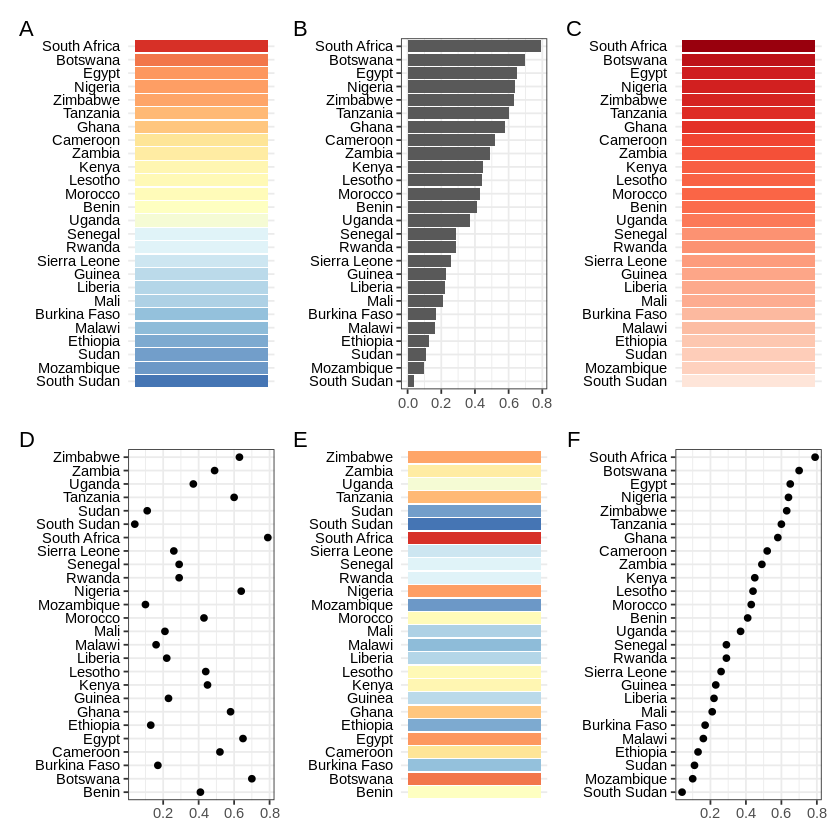

In [9]:
# all together
patchwork <- gg_hue2 + guides(fill = "none") +
    gg_dot3 + theme(axis.title.x = element_blank()) +
    gg_hue3 + guides(fill = "none") +
    gg_dot1 + theme(axis.title.x = element_blank()) +
    gg_hue1 + guides(fill = "none") +  
    gg_dot2 + theme(axis.title.x = element_blank()) +
    plot_layout(nrow = 2) + 
    plot_annotation(tag_levels = 'A')
patchwork
ggsave('figs/mobility_all.png')

## Part 2: Flight delays

In [10]:
# prepare the data
national <- c('JetBlue', 'Southwest', 'United', 'American', 'Delta', 'US')
regional <- c('ExpressJet', 'Envoy', 'Endeavor')

flight_delays <- flights %>%
    mutate(delay=arr_delay, big_delay=ifelse(delay > 15, 1, 0)) %>%
    group_by(carrier) %>%
    summarize(p_big_delay=mean(big_delay, na.rm=TRUE)) %>%
    merge(airlines, by='carrier') %>%
    mutate(short_name=gsub('(\\w+).*', '\\1', name)) %>%
    filter(short_name %in% c(national, regional)) %>%
    mutate(carrier_type=ifelse(short_name %in% national, 'National', 'Regional'))

flight_delays

carrier,p_big_delay,name,short_name,carrier_type
<chr>,<dbl>,<chr>,<chr>,<chr>
9E,0.2491616,Endeavor Air Inc.,Endeavor,Regional
AA,0.1879363,American Airlines Inc.,American,National
B6,0.2610779,JetBlue Airways,JetBlue,National
DL,0.1823408,Delta Air Lines Inc.,Delta,National
EV,0.3136104,ExpressJet Airlines Inc.,ExpressJet,Regional
MQ,0.2706794,Envoy Air,Envoy,Regional
UA,0.2179225,United Air Lines Inc.,United,National
US,0.1794665,US Airways Inc.,US,National
WN,0.2485885,Southwest Airlines Co.,Southwest,National


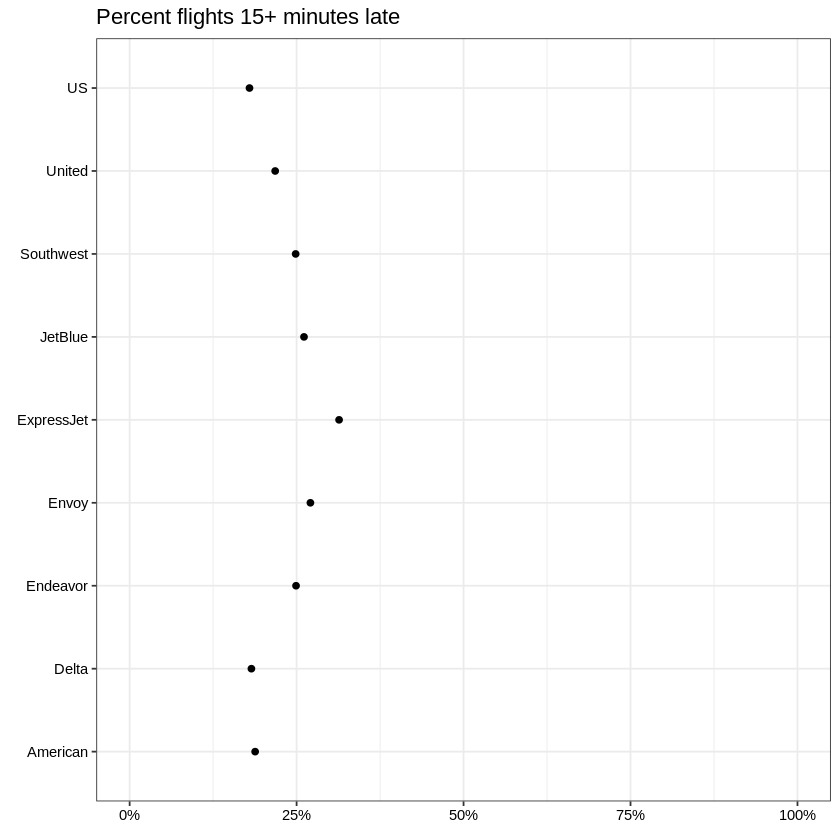

In [11]:
gg_delays1 <- ggplot(data=flight_delays, aes(x=p_big_delay, y=short_name)) +
    geom_point() +
    scale_x_continuous(element_blank(), label=percent, limits=c(0, 1)) +
    scale_y_discrete(element_blank()) +
    ggtitle('Percent flights 15+ minutes late') + 
    theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))
gg_delays1
ggsave('figs/flights1.png', width=4, height=4)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



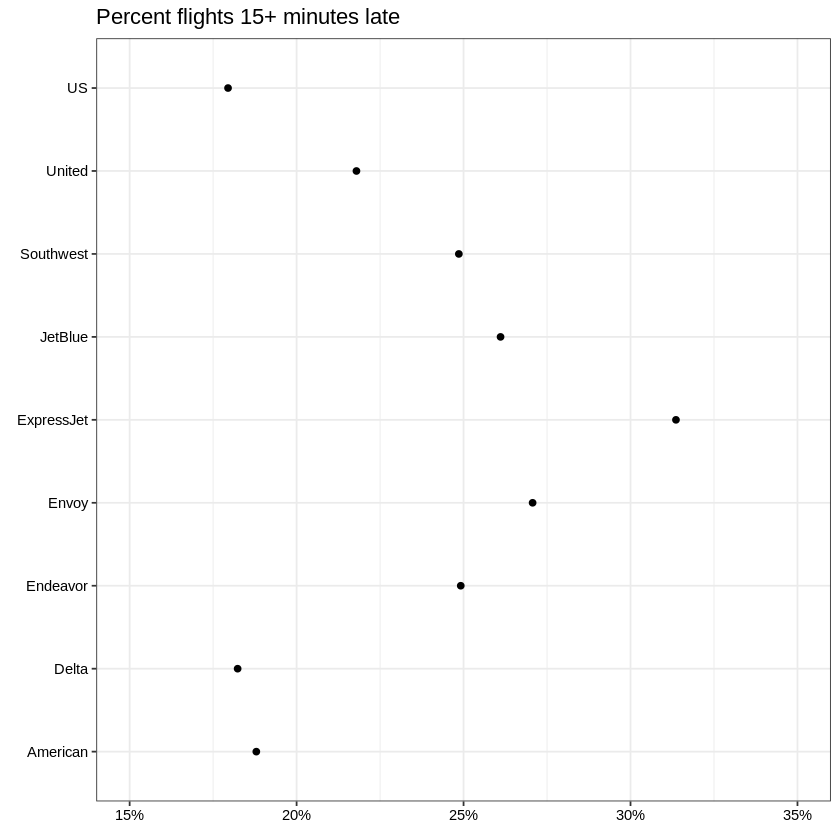

In [12]:
gg_delays2 <- gg_delays1 + scale_x_continuous(element_blank(), label=percent, limits=c(.15, .35))
gg_delays2
ggsave('figs/flights2.png', width=4, height=4)

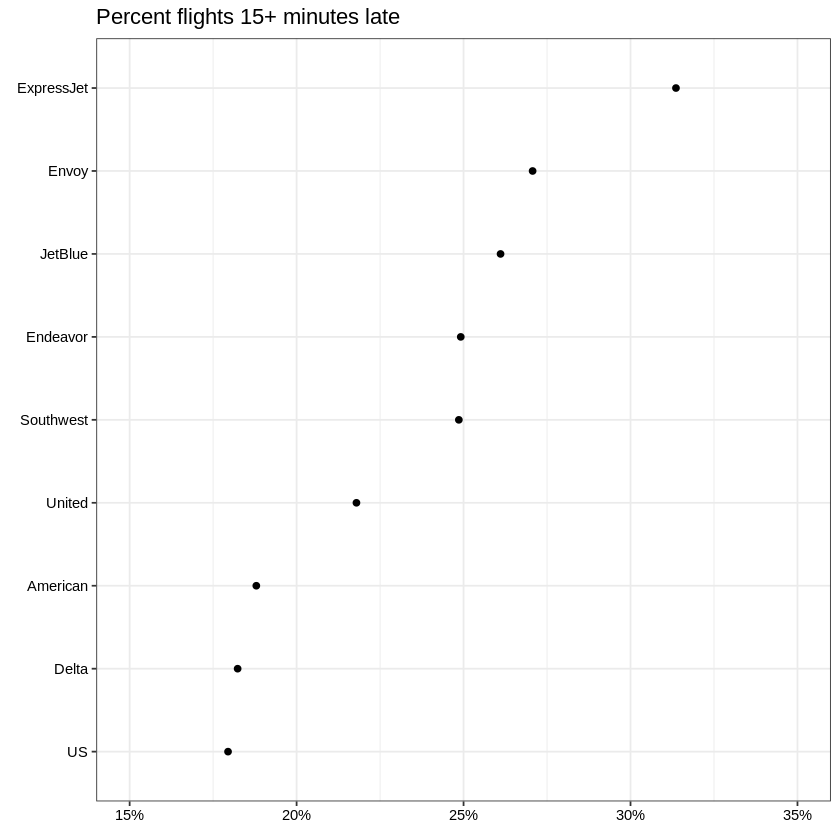

In [13]:
gg_delays3 <- gg_delays2 + aes(y = fct_reorder(short_name, p_big_delay))
gg_delays3
ggsave('figs/flights3.png', width=4, height=4)

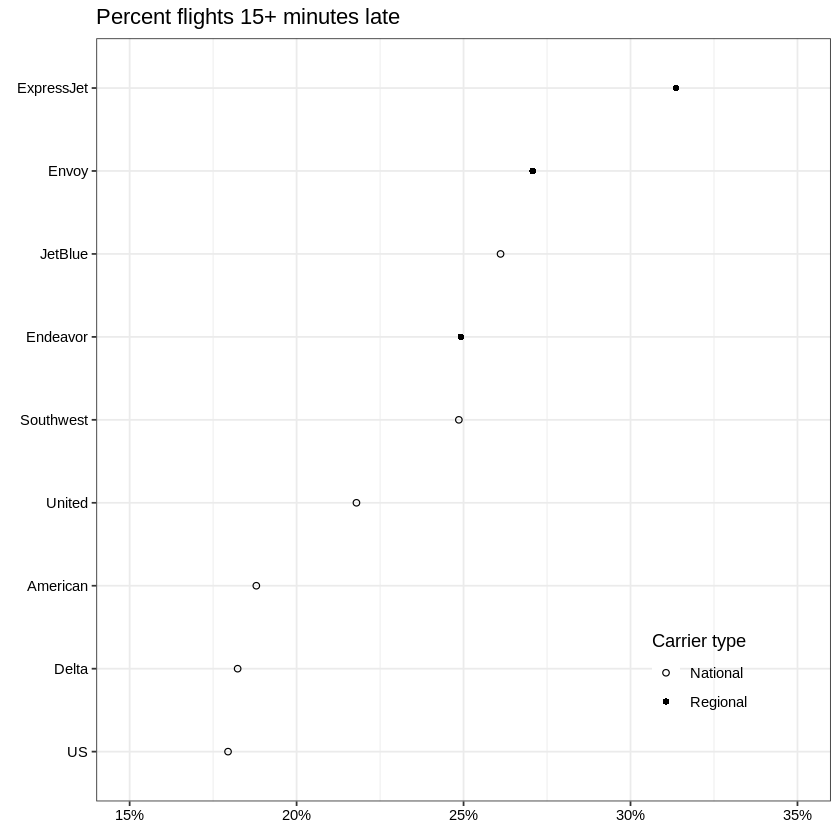

In [14]:
gg_delays4 <- ggplot(data=flight_delays, aes(x=p_big_delay, y=fct_reorder(short_name, p_big_delay))) +
    geom_point(aes(shape=carrier_type)) +
    scale_x_continuous(element_blank(), label=percent, limits=c(.15, .35)) +
    scale_y_discrete(element_blank()) +
    scale_shape_manual('Carrier type', values=c(1, 16)) +
    theme(legend.position=c(.9,.1), legend.justification=c(1,0),
        legend.background=element_blank(),
        axis.text.x = element_text(color="black"),
        axis.text.y = element_text(color="black")) +
    ggtitle('Percent flights 15+ minutes late')
gg_delays4
ggsave('figs/flights4.png', width=4, height=4)

## Part 3: Global surface temperatures

In [15]:
load('../data/globaltemps.Rdata')
head(globaltemps)

Year,Anomaly,Actual Temp,Fahrenheit
<dbl>,<dbl>,<dbl>,<dbl>
1880,-0.1148,13.7852,56.81336
1881,-0.0628,13.8372,56.90696
1882,-0.0648,13.8352,56.90336
1883,-0.1424,13.7576,56.76368
1884,-0.2009,13.6991,56.65838
1885,-0.2125,13.6875,56.63750


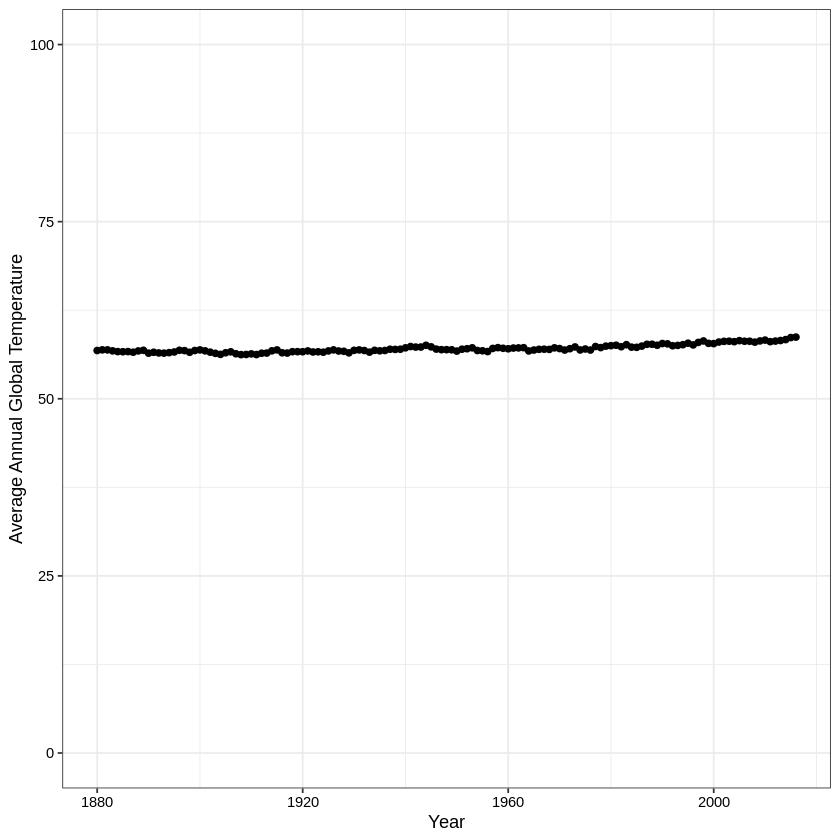

In [16]:
ggplot(data=globaltemps, aes(x=Year, y=Fahrenheit)) + 
  geom_point() + 
  scale_y_continuous('Average Annual Global Temperature', limits = c(0, 100)) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))
ggsave('figs/global_temps1.png', width=4, height=4)

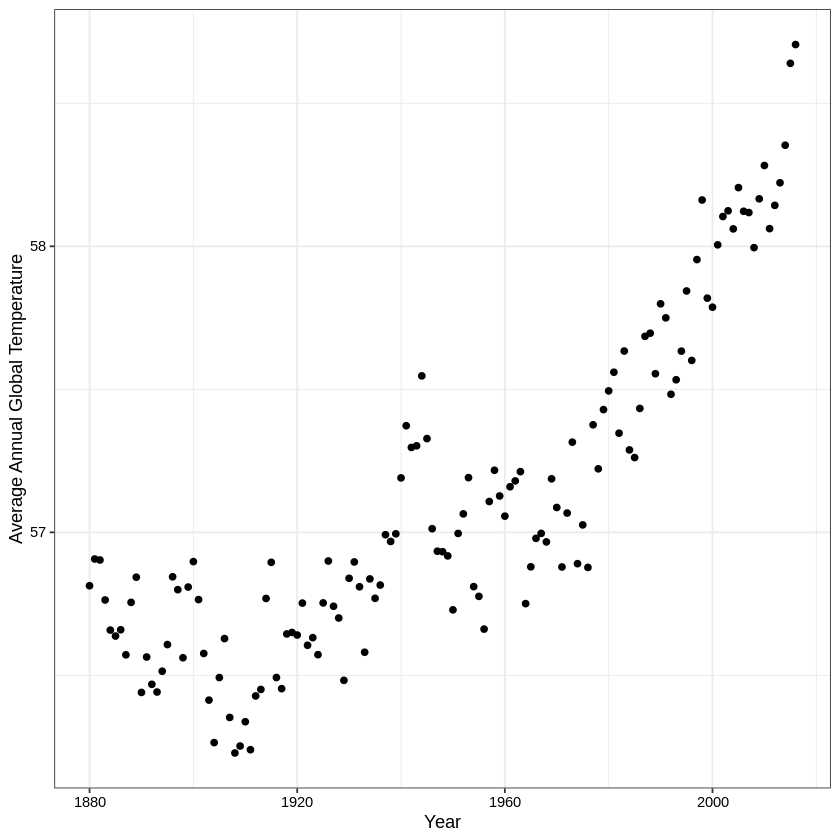

In [17]:
ggplot(data=globaltemps, aes(x=Year, y=Fahrenheit)) + 
  geom_point() + 
  scale_y_continuous('Average Annual Global Temperature') + 
  theme(axis.text.x = element_text(color="black"), 
        axis.text.y = element_text(color="black"))
ggsave('figs/global_temps2.png', width=4, height=4)

## Part 4: Stop-and-frisk

In [18]:
load('../data/sqf.Rdata')

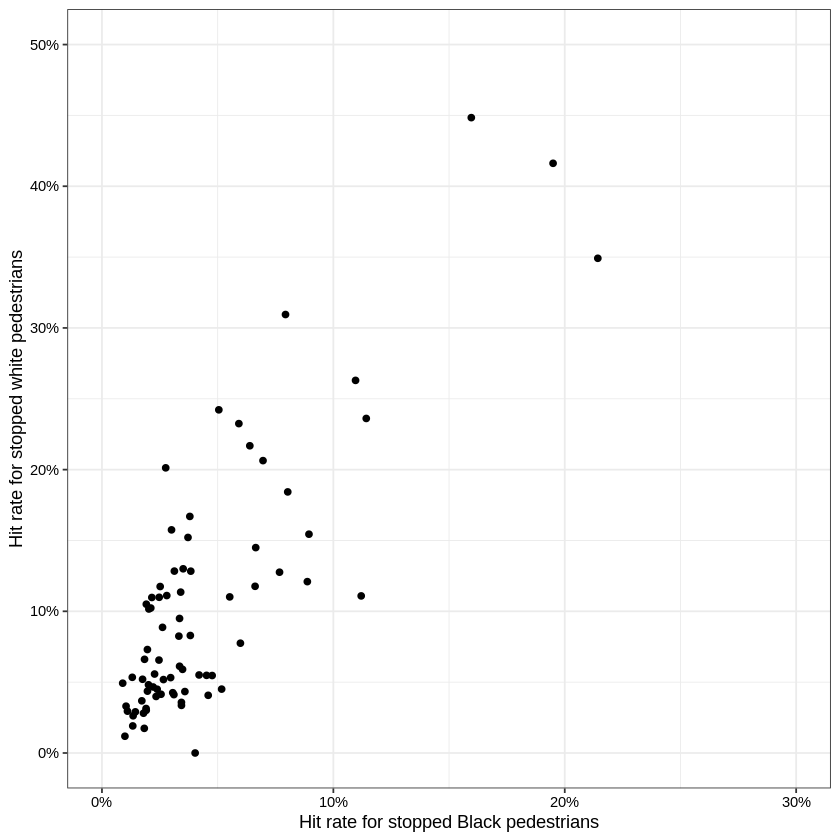

In [19]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('Hit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .3)) +
  scale_y_continuous('Hit rate for stopped white pedestrians',
                     labels=percent, limits=c(0, .5)) +
  theme(axis.text.x = element_text(color="black"),
        axis.text.y = element_text(color="black"))
ggsave('figs/sqf1.png', width=4, height=4)

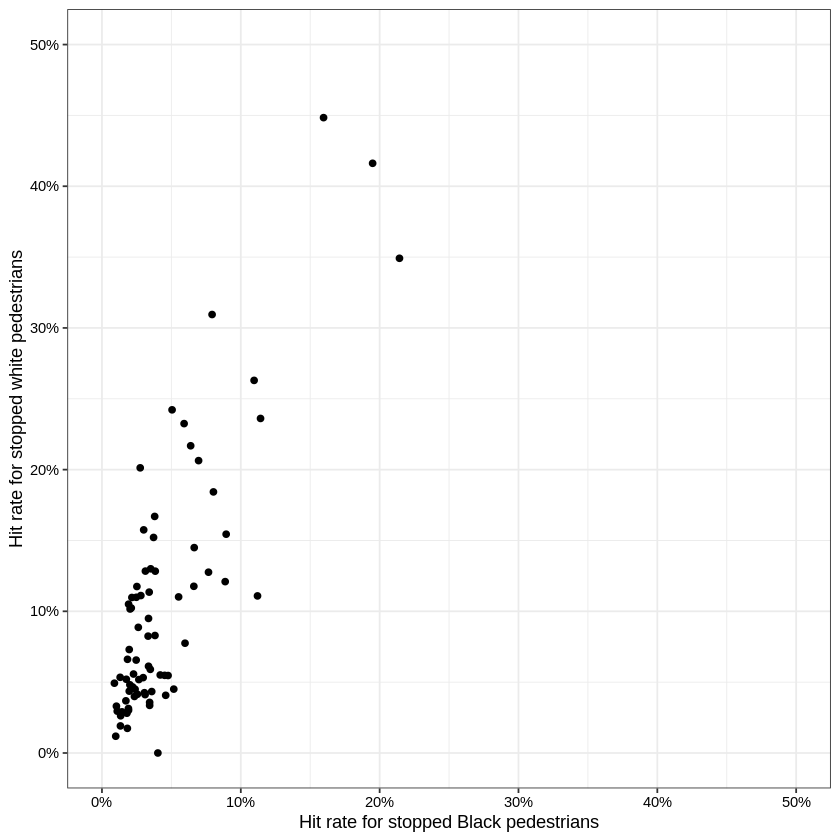

In [20]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('Hit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians',
                     labels=percent, limits=c(0, .5)) +
  theme(axis.text.x = element_text(color="black"),
        axis.text.y = element_text(color="black"))
ggsave('figs/sqf2.png', width=4, height=4)

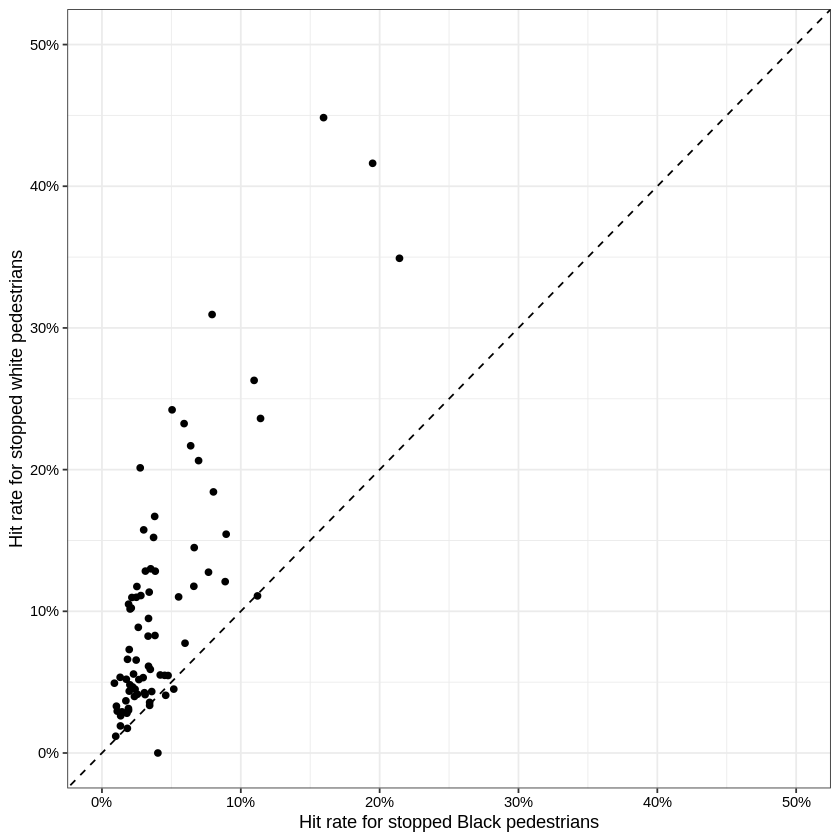

In [21]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_x_continuous('Hit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians',
                     labels=percent, limits=c(0, .5)) +
  theme(axis.text.x = element_text(color="black"),
        axis.text.y = element_text(color="black"))
ggsave('figs/sqf3.png', width=4, height=4)